In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [30]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [125]:
df['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [126]:
df['piscina'].value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [127]:
df['centroscomercialescercanos'].value_counts() 

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [128]:
df['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [129]:
df['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [130]:
df['precio'].value_counts()

1500000.0     3041
2500000.0     3036
1200000.0     2909
3500000.0     2726
1300000.0     2480
2200000.0     2420
1100000.0     2394
1800000.0     2290
1600000.0     2217
850000.0      2192
750000.0      2163
1250000.0     2159
2300000.0     2108
1350000.0     2103
650000.0      2061
3200000.0     2054
4500000.0     2040
2000000.0     1904
950000.0      1867
1650000.0     1865
2800000.0     1863
1400000.0     1850
550000.0      1820
2100000.0     1802
3000000.0     1791
1700000.0     1763
1850000.0     1760
2600000.0     1735
1150000.0     1722
1750000.0     1702
              ... 
10807000.0       1
468778.0         1
675411.0         1
468768.0         1
7500250.0        1
10815000.0       1
3752490.0        1
469105.0         1
338144.0         1
1352990.0        1
938630.0         1
10822700.0       1
2705670.0        1
1877000.0        1
407500.0         1
1352610.0        1
676300.0         1
2705184.0        1
938426.0         1
1876500.0        1
1352560.0        1
469208.0    

In [131]:
#NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT
#------------------------------------------------#

#NUMERICOS QUE SOLO SON CERO O UNO
df['usosmultiples'] = df['usosmultiples'].astype(np.int8)
df['piscina'] = df['piscina'].astype(np.int8)
df['gimnasio'] = df['gimnasio'].astype(np.int8)
df['escuelascercanas'] = df['escuelascercanas'].astype(np.int8)
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype(np.int8)


#FECHA DE PUBLICACION A DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])


# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [22]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int
#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

0

In [16]:
# Porcentaje de NaN's por columna, sabiendo que existen 240.000 filas
df.isnull().sum() / 240000 * 100

id                             0.000000
titulo                         2.244583
descripcion                    0.674583
tipodepropiedad                0.019167
direccion                     22.113333
ciudad                         0.155000
provincia                      0.064583
antiguedad                    18.147917
habitaciones                   9.362917
garages                       15.735417
banos                         10.925417
metroscubiertos                7.250000
metrostotales                 21.444583
idzona                        11.925417
lat                           51.453333
lng                           51.453333
fecha                          0.000000
gimnasio                       0.000000
usosmultiples                  0.000000
piscina                        0.000000
escuelascercanas               0.000000
centroscomercialescercanos     0.000000
precio                         0.000000
dtype: float64

In [20]:
dropdown_categories = df.loc[:,['provincia','ciudad','habitaciones','garages','tipo_de_propiedad']]
dropdown_categories.isnull().sum() / 240000 * 100

provincia        0.064583
ciudad           0.155000
habitaciones     9.362917
garages         15.735417
dtype: float64

In [121]:
# Voy a estudiar el % de completitud de las categorias de interes a lo largo del tiempo
df['fecha'] = pd.to_datetime(df['fecha'])

nulos_por_anio = df.drop(['descripcion','tipodepropiedad','ciudad','provincia','metroscubiertos'
                          ,'gimnasio','usosmultiples','piscina','escuelascercanas'
                          ,'centroscomercialescercanos','precio', 'idzona', 'id', 'fecha'],1)

nulos_por_anio['anio'] = df['fecha'].dt.year
nulos_por_anio.head()

def contar_nulos(serie):
    
    serie = serie.apply(lambda x: 1 if pd.isnull(x) else 0)#.apply(hacer_dos)
    return np.sum(serie)
    
nulos_por_anio_cat = nulos_por_anio.groupby('anio').agg(contar_nulos).reset_index()
totales_por_anio = nulos_por_anio.groupby('anio')['lat'].agg(len).reset_index()
totales_por_anio = totales_por_anio.rename(columns={'lat' : 'totales'})

pct_nulos_por_anio_cat = pd.merge(nulos_por_anio_cat, totales_por_anio, on = 'anio', how = 'inner')

def sacar_porcentaje(serie):
    
    copia_anios = serie['anio']
    copia_totales = serie['totales']
    serie_porcentual = serie / copia_totales * 100
    
    serie_porcentual['anio'] = copia_anios
    serie_porcentual['totales'] = copia_totales
    
    return serie_porcentual

pct_nulos_por_anio_cat = pct_nulos_por_anio_cat.apply(sacar_porcentaje, axis = 1)
pct_nulos_por_anio_cat['anio'] = pct_nulos_por_anio_cat['anio'].astype(np.int32)
pct_nulos_por_anio_cat['totales'] = pct_nulos_por_anio_cat['totales'].astype(np.int32)
pct_nulos_por_anio_cat.head()
#nulos_por_anio_cat.head()

#nulos_por_anio.groupby('anio').
#nulos_por_anio.isnull().sum() / 240000 * 100
#df2['direccion'] = df['direccion']
#df2['metros_totales'] = df['metros_totales']
#df2['year'] = df['fecha']#.dt.year 


,anio,titulo,direccion,antiguedad,habitaciones,garages,banos,metrostotales,lat,lng,totales
0,2012,11.332540,10.605932,0.254950,8.965752,8.778788,10.346732,29.072831,59.909068,59.909068,23534
1,2013,1.951557,25.857303,1.471072,8.809978,8.118871,10.123083,25.742118,34.683736,34.683736,30386
2,2014,2.627428,26.515824,23.925367,10.386473,13.159322,11.081534,21.909198,58.678399,58.678399,40572
3,2015,1.225957,29.516223,28.305809,9.129590,15.181659,10.953954,19.265592,58.721585,58.721585,51470
4,2016,0.457262,17.832153,19.962143,9.327081,21.352007,11.246517,19.139071,47.660520,47.660520,94038


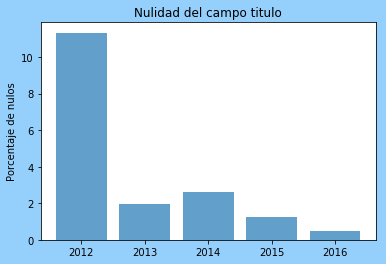

In [151]:
ds = pct_nulos_por_anio_cat

objects = ds['anio']
y_pos = np.arange(len(objects))
performance = ds['titulo']

fig = plt.figure()
fig.patch.set_facecolor('xkcd:light blue')

plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Porcentaje de nulos')
plt.title('Nulidad del campo titulo')
plt.show()



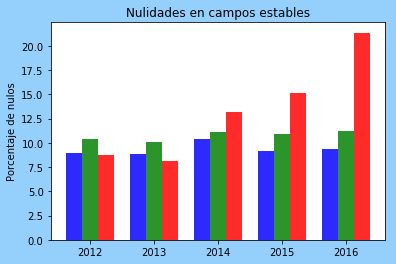

In [168]:
ds = pct_nulos_por_anio_cat

import numpy as np
import matplotlib.pyplot as plt

data = [ds['habitaciones'], ds['banos'], ds['garages']]
objects = ds['anio']

fig = plt.figure()
fig.patch.set_facecolor('xkcd:light blue')

X = np.arange(5)

plt.ylabel('Porcentaje de nulos')
plt.title('Nulidades en campos estables')

plt.bar(X + 0.00, data[0], color = 'b', alpha = 0.83 ,width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', alpha = 0.83 , width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', alpha = 0.83 , width = 0.25)
plt.xticks(X+0.25, objects)


plt.show()